In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#sklearn imports
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score #plot_confusion_matrix
#from sklearn.metrics import plot_confusion_matrix



import scipy as sp
from pydataset import data
from env import get_db_url, user, password, host
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare
import os
directory = os.getcwd()

#### 1. What is your baseline prediction? What is your baseline accuracy? *remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.*

In [3]:
df = acquire.get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
train, validate, test = prepare.prep_titanic_data(df)
train.shape, validate.shape, test.shape

((498, 11), (214, 11), (179, 11))

In [5]:
train.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [6]:
train.survived.value_counts(normalize=True)

0    0.616466
1    0.383534
Name: survived, dtype: float64

In [7]:
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = validate.drop(columns='survived')
y_val = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

In [8]:
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [9]:
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [10]:
X_train.head()

,Unnamed: 0,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,1,36.000000,0,0,40.1250,1,1,0,0
165,165,3,9.000000,0,2,20.5250,0,1,0,1
50,50,3,7.000000,4,1,39.6875,0,1,0,1
259,259,2,50.000000,0,1,26.0000,0,0,0,1
306,306,1,29.678105,0,0,110.8833,1,0,0,0


In [11]:
# make the model

tree1 = DecisionTreeClassifier(max_depth=3, random_state=1349)

In [12]:
# fit the model
tree1 = tree1.fit(X_train, y_train)

In [13]:
# use
y_predictions = tree1.predict(X_train)

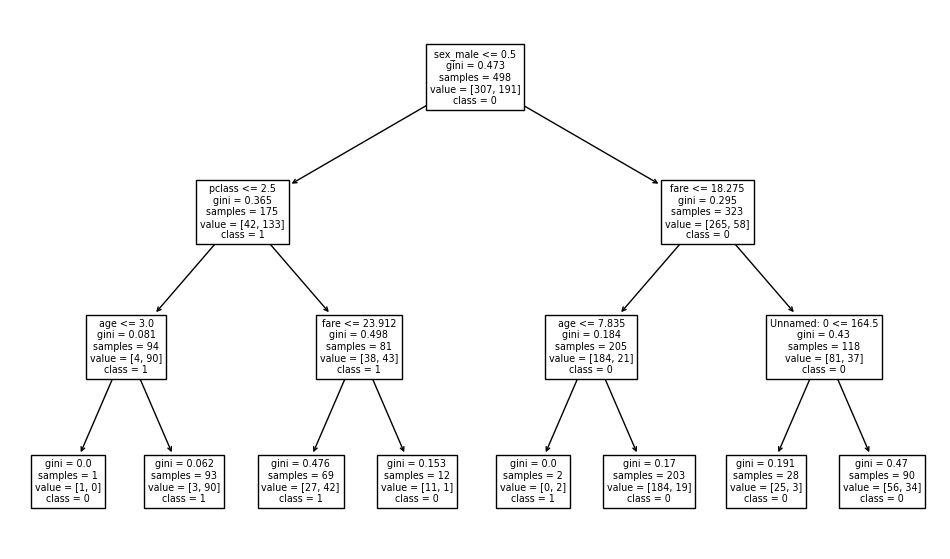

In [14]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns.tolist(), class_names=['0','1'])
plt.show()

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [25]:
acc = tree1.score(X_train, y_train)
acc

0.8253012048192772

In [26]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [15]:
# plot_confusion_matrix(tree1, X_train, y_train)
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [16]:
report = classification_report(y_train, y_predictions, output_dict=True)
report

{'0': {'precision': 0.8293413173652695,
  'recall': 0.9022801302931596,
  'f1-score': 0.8642745709828392,
  'support': 307.0},
 '1': {'precision': 0.8170731707317073,
  'recall': 0.7015706806282722,
  'f1-score': 0.7549295774647887,
  'support': 191.0},
 'accuracy': 0.8253012048192772,
 'macro avg': {'precision': 0.8232072440484883,
  'recall': 0.8019254054607159,
  'f1-score': 0.8096020742238139,
  'support': 498.0},
 'weighted avg': {'precision': 0.8246360643391443,
  'recall': 0.8253012048192772,
  'f1-score': 0.8223370333082455,
  'support': 498.0}}

In [17]:
print("Tree of 1 depth")
pd.DataFrame(report).T

Tree of 1 depth


,precision,recall,f1-score,support
0,0.829341,0.902280,0.864275,307.000000
1,0.817073,0.701571,0.754930,191.000000
accuracy,0.825301,0.825301,0.825301,0.825301
macro avg,0.823207,0.801925,0.809602,498.000000
weighted avg,0.824636,0.825301,0.822337,498.000000


#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [18]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(277, 30, 57, 134)

In [19]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [20]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

#### 5. Run through steps 2-4 using a different `max_depth` value.

In [21]:
# making a loop to speed up the process of making the models.
for i in range(1, 21):
    # Make the model
    trees = DecisionTreeClassifier(max_depth=i, random_state=1349)

    # Fit the model (on train and only train)
    trees = trees.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = trees.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

#### When our models max depth is 15 or over, the accuracy is the bust, but its maybe not the best model.

#### 6. Which model performs better on your in-sample data?

#### models with 15+ max depth preform with the highest accuracymetrics = []

#### 7. Which model performs best on your out-of-sample data, the `validate` set?

In [22]:
metrics = []

for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.847390,0.789720,0.057670
4,5,0.861446,0.771028,0.090418
5,6,0.875502,0.780374,0.095128
6,7,0.897590,0.771028,0.126562
7,8,0.923695,0.780374,0.143321
8,9,0.951807,0.766355,0.185452
9,10,0.963855,0.766355,0.197500


- models with a depth of 14+ have the highest accuracy but how does that compare to the validate data?

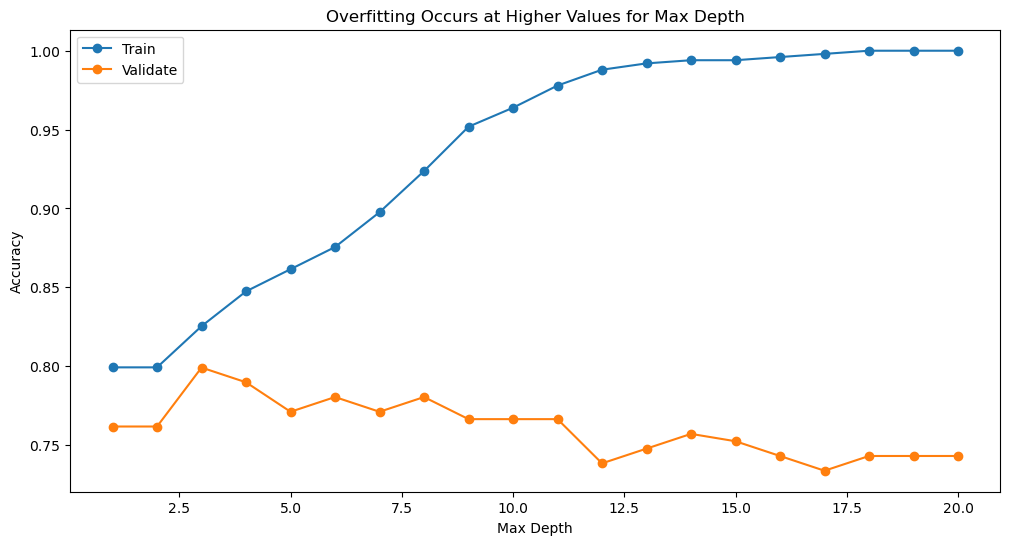

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# leta not look at any model with a defference over .1
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.825301,0.799065,0.026236
3,4,0.847390,0.789720,0.057670
5,6,0.875502,0.780374,0.095128
4,5,0.861446,0.771028,0.090418
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515


In [25]:
# max depth of 3, 5, 8 have the same validity accuracy, so lets take the model with the least difference.
# the model with a max dept of 3 will be our best model.

#### 1. Work through these same exercises using the `Telco` dataset.

In [31]:
telco = acquire.get_telco_data()
telco.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [32]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [33]:
telco.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [30]:
def split_telco_data(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=1349, 
                                        stratify=df.Churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=1349, 
                                   stratify=train_validate.Churn)
    return train, validate, test

In [ ]:
def prep_telco(df):
    df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
    df = df.drop(columns=['InternetService', 'Contract', 'PaymentMethod'])
    df['gender'] = df.gender.map({'Female': 1, 'Male': 0})
    df['Partner'] = df.Partner.map({'Yes': 1, 'No': 0})
    df['Dependents'] = df.Dependents.map({'Yes': 1, 'No': 0})
    df['PhoneService'] = df.PhoneService.map({'Yes': 1, 'No': 0})
    df['PaperlessBilling'] = df.PaperlessBilling.map({'Yes': 1, 'No': 0})
    df.TotalCharges.fillna('20.20',inplace=True)
    df['Churn'] = df.Churn.map({'Yes': 1, 'No': 0})
    dummy_df = pd.get_dummies(df[['MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']],
                              drop_first=True)
    df = df.drop(columns=['MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])
    df = pd.concat([df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_telco_data(df)
    
    return train, validate, test

#### 2. Experiment with this model on other datasets with a higher number of output classes.